In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az

In [2]:
sns.set()

Probabilistic model:

\begin{align*}
y &\sim \mathcal{N}(\alpha + \beta x, \epsilon) \\
\alpha &\sim \mathcal{N}(\mu_\alpha, \sigma_\alpha)\\
\beta &\sim \mathcal{N}(\mu_\beta, \sigma_\beta)\\
\epsilon &\sim |\mathcal{N}(0, \sigma_\epsilon)|,
\end{align*}

where $y$ is the observed variable and $x$ is an independent, deterministic variable.

Let us generate data:

In [3]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

Standard least-squares solution:

In [4]:
# solution using either sklearn or from scratch

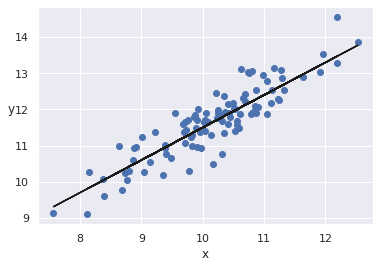

In [5]:
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x, y_real, 'k');

Let us implement the probabilistic model with pymc(3)

In [6]:
with pm.Model() as model_g:
    alpha = pm.Normal("alpha", mu=0, sd=10)
    beta = pm.Normal("beta", mu=0, sd=1)
    epsilon = pm.HalfNormal("epsilon", 5)

    mu = pm.Deterministic("mu", alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 14 seconds.
The acceptance probability does not match the target. It is 0.8909050786514228, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 110 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.597593346285128, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


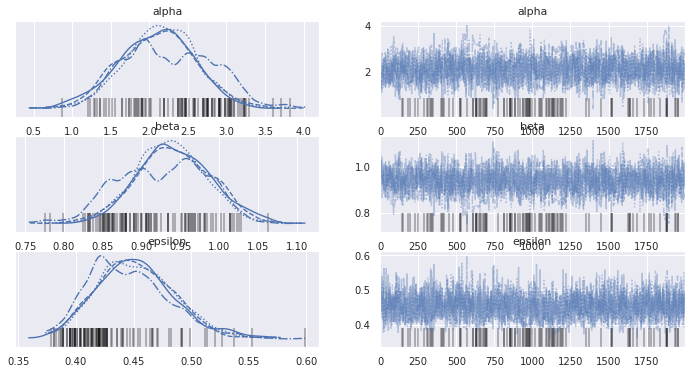

In [7]:
az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon']);

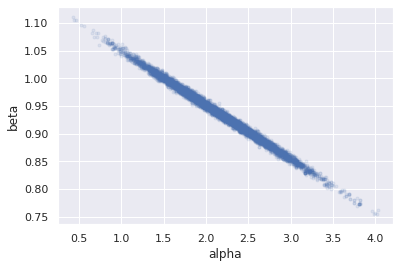

In [8]:
az.plot_pair(idata_g, var_names=['alpha', 'beta'], scatter_kwargs={'alpha': 0.1});

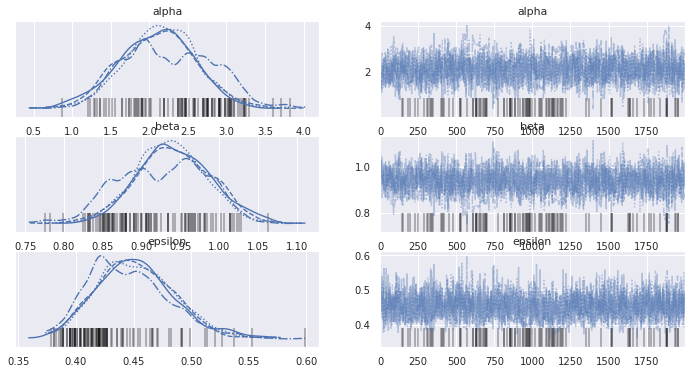

In [9]:
az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon']);

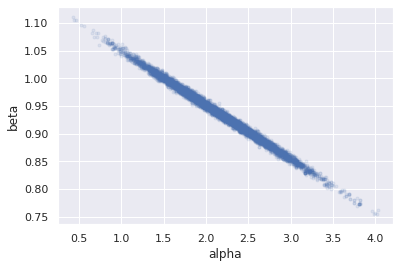

In [10]:
az.plot_pair(idata_g, var_names=['alpha', 'beta'], scatter_kwargs={'alpha': 0.1});

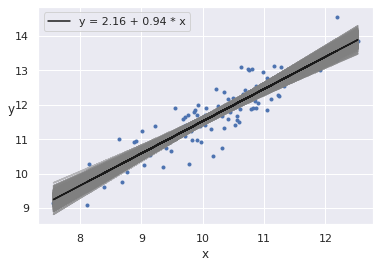

In [11]:
plt.plot(x, y, 'C0.')

posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()

draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * x[:,None], c='gray', alpha=0.5)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();